# Exploring Color Magnitude Diagrams in Python
##### By: J. Isbell, N. Franz, E. Prather
---

### Background on Notebooks
Some vital information:
1. This is called a "Jupyter Notebook" (said like Jupiter Notebook). It is a common tool used by astronomers to write and develop code for their research.  
2. Each block of code is called a "cell", to run a cell you can click into it with your mouse and either press `Shift-Enter` or `Ctrl-Enter` (`CMD-Enter` on a mac).
3. When you run a cell, some will output plots/figures or text at the bottom of them. This will give you some information about the code and color magnitude diagrams. Other cells won't have any output, and that's okay!
4. You may not understand fully what the code is doing and that is *totally okay*! This is as much about the astronomy as it is the code. Our goal for this notebook is to provide a soft introduction to Python code for those who have never seen it.

---

### Setup for the Notebook

Before doing anything else, we need to execute the following cell by pressing `Shift-Enter`. This cell will install some existing code we need for the Notebook and download some data that we have prepped for it.

In [1]:
# Import useful software for this workbook
%load_ext autoreload
%autoreload 2
import os
from urllib.request import urlopen
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib.patches import Ellipse, Rectangle

#############################################################################################################################
######################################### Download and install some Software/Code ###########################################
#############################################################################################################################
data_urls = [
    "https://raw.githubusercontent.com/noahfranz13/astro-education-nbs/refs/heads/main/notebooks/util.py", # useful code
    "https://raw.githubusercontent.com/noahfranz13/astro-education-nbs/refs/heads/main/data/gaia_cone_search_results.csv", # Gaia results
    "https://github.com/noahfranz13/astro-education-nbs/raw/refs/heads/main/data/isochrones.pkl.zip" # isochrone data
]

for url in data_urls:
    
    # derive the filename from the url
    filename = os.path.join(os.getcwd(), url.split("/")[-1])
    if os.path.exists(filename): continue

    # request the data from that url and write it to a file
    res = urlopen(url)
    with open(filename, "wb") as f:
        f.write(res.read())

try:
    from util import *
except ImportError as exc:
    raise Exception("Please make sure you run the above cell to download all of the other code and data!") from exc
#############################################################################################################################


---

### 1. Reviewing Hertzsprung-Russell / Color Magnitude Diagrams

First, try to fill in this table with your intuition for meaning of locations on a Color Magnitude Diagram. The labels you ca
n choose from are `bluer, brighter`, `redder, brighter`, `bluer, dimmer`, `redder, dimmer`. For reference, use the following labelled color magnitude diagram.

<img src=./example-cmd.png width=40% height=40%></img>

To edit the table, double click ON ME (or anywhere in this text) and then change the "CHANGE ME" text.

<!-- THIS IS THE TABLE YOU SHOULD EDIT -->
| Location    | Label     |
| ----------- | --------- |
| Upper Left  | CHANGE ME |
| Upper Right | CHANGE ME |
| Lower Left  | CHANGE ME |
| Lower Right | CHANGE ME |

Now, we're going to write some code! In the code cell below, change all of the "CHANGE ME" values to the corresponding values from the table you just completed. (but be sure to leave the double quotes around it!)

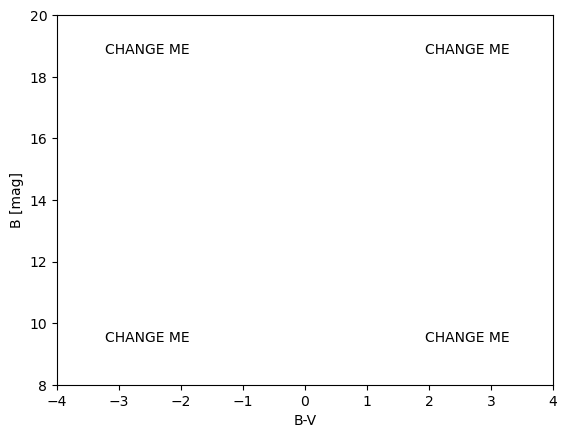

In [2]:
labels = {
    "upper-left":   "CHANGE ME",
    "upper-right":  "CHANGE ME", 
    "lower-left":   "CHANGE ME", 
    "lower-right":  "CHANGE ME"
    }

plot_labels_cmd(labels)

Next, we'll do the same thing but using color labels rather than the relative temperature. While doing this you should be thinking about how these color magnitude diagrams connect to the Hertzsprung-Russell diagrams! 

Your label word bank is: `redder, brighter`, `redder, dimmer`, `bluer, brighter`, `bluer, dimmer`

*HINT!*  Try to think about how the color relates to the temperture labels you gave in the previous question!

| Location    | Label     |
| ----------- | --------- |
| Upper Left  | CHANGE ME |
| Upper Right | CHANGE ME |
| Lower Left  | CHANGE ME |
| Lower Right | CHANGE ME |

And, just like above, change the CHANGE ME's below (but be sure to leave the double quotes around it!).

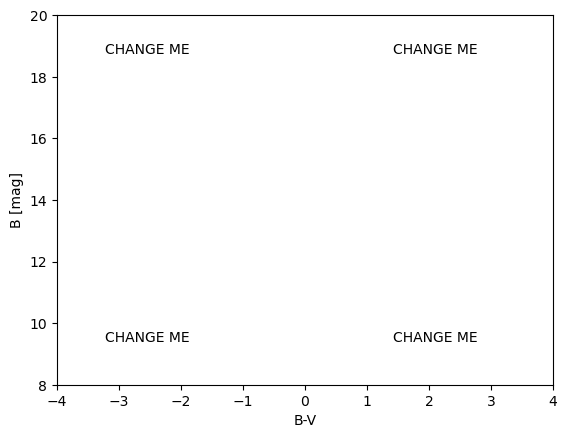

In [3]:
labels = {
    "upper-left":   "CHANGE ME",
    "upper-right":  "CHANGE ME", 
    "lower-left":   "CHANGE ME", 
    "lower-right":  "CHANGE ME"
    }

plot_labels_physical(labels)

---

### 2. Exploring the Dataset

For this activity, we've put together a dataset of stars that may (or may not, as we'll see later) belong to the cluster [Messier 67](https://en.wikipedia.org/wiki/Messier_67). As you probably learned in this class, stars in clusters tend to have nearly the same age since they were all born around when the cluster itself was born. Also since they are in a cluster, they should all be at about the same location on the sky and distance from Earth. These are all examples of cuts we can make on much larger datasets to isolate just the stars in a single cluster.

For now, we are just going to give you all a relatively cleaned version of the dataset of the stars in M67. Later on you will have to do more of this yourself.

When we plot the Color Magnitude Diagram of M67 wfrom this data we get the following plot.

_ACTIVITY_:
Place the following letters at the corresponding coordinates on the figure.
1. Put an A somewhere on the main sequence
2. Place a B at the coordinates where a star that has evolved off the main sequence is currently living (i.e. the Red Giant Branch)
3. Place a C at the coordinates where a star that is currently on the Red Giant Branch would have been on the main sequence.
4. Place a D on top of stars that are currently evolving off of the main sequence (i.e. the "Main Sequence Turnoff Point")
5. Place an E where stars that have evolved past the Red Giant Branch would be on this diagram. (Hint: this is where White Dwarf Stars are on this diagram).

To do this, replace the "CHANGE ME" below for each labels x and y position. For example, if I thought A resided at the coordinates (0.4, 11) I would change 
```
A_coordinate = ("CHANGE ME", "CHANGE ME")
```
to
```
A_coordinate = (0.4, 11)
```

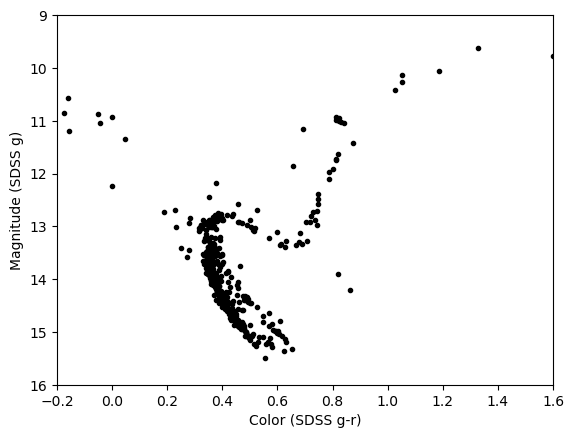

In [4]:
A_coordinate = ("CHANGE ME", "CHANGE ME")
B_coordinate = ("CHANGE ME", "CHANGE ME")
C_coordinate = ("CHANGE ME", "CHANGE ME")
D_coordinate = ("CHANGE ME", "CHANGE ME")
E_coordinate = ("CHANGE ME", "CHANGE ME")

### CODE TO DISPLAY THE CLUSTER DATA AND COORDINATES
### DO NOT CHANGE BELOW THIS LINE
ax = show_cluster_data()
write_label(*A_coordinate, "A", ax)
write_label(*B_coordinate, "B", ax)
write_label(*C_coordinate, "C", ax)
write_label(*D_coordinate, "D", ax)
write_label(*E_coordinate, "E", ax)

---
### 3. From Data to Isochrones

Isochrones are evolutionary tracks of a single stellar population on a Color-Magnitude Diagram. Rather than the messier dataset that you labelled above, these are _models_ of what a single stellar population would look like. 

A sample isochrone is shown below. Please label it with the same labels you used above for the dataset of M67:
1. Put an A somewhere on the main sequence
2. Place a B at the coordinates where a star that has evolved off the main sequence is currently living (i.e. the Red Giant Branch)
3. Place a C at the coordinates where a star that is currently on the Red Giant Branch would have been on the main sequence.
4. Place a D on top of stars that are currently evolving off of the main sequence (i.e. the "Main Sequence Turnoff Point")
5. Place an E where stars that have evolved past the Red Giant Branch would be on this diagram. (Hint: this is where White Dwarf Stars are on this diagram).

After labeling the figure with the letters, try playing around by changing the `age` variable. You can put it anywhere between 1 and 14.5 (which is the age in Gyr or $10^9$ years!) 

How does this change the y axis limits? How does this change the location of the main sequence turnoff?

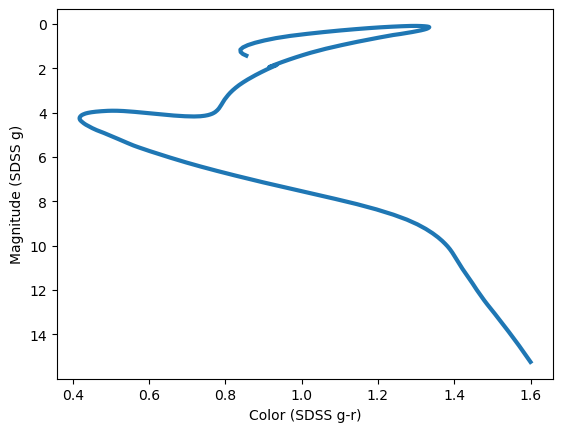

In [5]:
A_coordinate = ("CHANGE ME", "CHANGE ME")
B_coordinate = ("CHANGE ME", "CHANGE ME")
C_coordinate = ("CHANGE ME", "CHANGE ME")
D_coordinate = ("CHANGE ME", "CHANGE ME")
E_coordinate = ("CHANGE ME", "CHANGE ME")

age = 8

### CODE TO DISPLAY THE CLUSTER DATA AND COORDINATES
### DO NOT CHANGE BELOW THIS LINE
ax = show_isochrone(age=age)
# ax.invert_yaxis()
write_label(*A_coordinate, "A", ax)
write_label(*B_coordinate, "B", ax)
write_label(*C_coordinate, "C", ax)
write_label(*D_coordinate, "D", ax)
write_label(*E_coordinate, "E", ax)

--- 
### 4. Fitting Data with Isochrones

Isochrones are primarily dependent on the age of the stellar population (Some other properties matter, like metallicity, but we aren't worrying about those here). _When studying a cluster of stars, we are interested in measuring the age of the population._ To do this, we need to fit the measured data with our model isochrone. But, isochrones, like the ones we use here, are typically given in absolute magnitudes ($\sim$luminosity), so they must be rescaled to apparent magnitude space to compare with our dataset.

To rescale our isochrone data, we use the _distance modulus_, which converts from the absolute magnitude to apparent magnitude given a distance. The equation for the distance modulus is

$m-M = 5 \log_{10}(\frac{d}{10 pc})$.

Unfortunately, this introduces a second parameter to our isochrone fitting: the distance to the cluster. 

Below, we show three different isochrones at different ages and distances. Some questions on these:
1. Which color isochrone is the best fit?
2. What do you think you should do to the other two isochrones to make them better fits? (Hint: make sure you play around with the age above and see how it changes the isochrone location!) (Hint 2: Remember that the two variables you can change are distance and age. What do you think increasing or decreasing distance will do to the location of the isochrone?)

<!--
1. Libarary of pre-computed models for different ages and metallicities
    - maybe [https://waps.cfa.harvard.edu/MIST/model_grids.html](https://waps.cfa.harvard.edu/MIST/model_grids.html)
2. Functions to change them by distance 
3. Interactive element to have them scale/change the values 
    - start with sliders and then move into code entering???
    - display a range of values to guide some guesswork 
4. Ask which isochrones work best and why? 
    - can we find an example where there's some degeneracy? 
-->

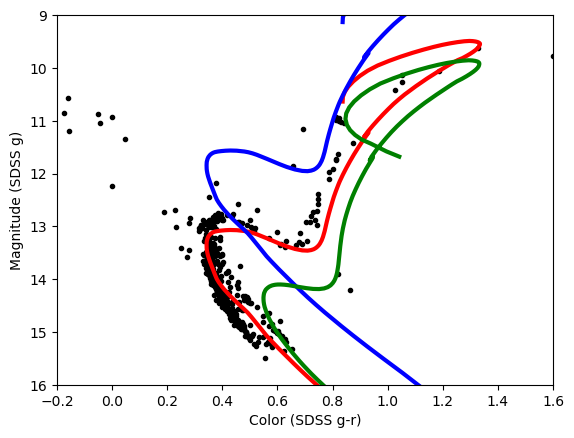

In [7]:
ax = show_cluster_data()
ax = show_correct_isochrone(ax=ax)
ax = show_close_isochrone(ax=ax)
ax = show_old_isochrone(ax=ax)
ax.invert_yaxis()

---
### 5. Changing the Dataset

Before our final challenged, let's explore in a bit more detail how we actually got the data for M67. This way, you can tune different parameters if you'd like to narrow (or broaden) the focus of the dataset. 

We started with all of the data from Gaia, a space based astronomy telescope that is surveying the entire Milky Way and parts of nearby galaxies. We then made the following cuts on the dataset:
1. We performed a cone search centered on the coordinates of the cluster with a radius of 2 arcseconds. You can imagine that narrowing this radius will cut out some stars in the cluster and broadening it will possibly include some field stars that are not in the cluster. Of course, the 2 arcsecond radius is just what we thought was best, so you should definitely play around with it!
2. You can imagine that, since the stars in a cluster are gravitationally bound, all of them should be moving on the sky at about the same velocity with some small amount of deviation. This allows us to tune two other parameters:
   a. Radial velocity is a stars velocity towards or away from Earth. We can set an upper and lower limit on this to find stars that are moving similar to eachother on the sky
   b. Proper motion is a stars velocity across the sky and is typically measured in both the RA and Declination directions. So, we can make a cut on proper motion by removing stars that lie outside some proper motion delta centered at a proper motion RA and Declination.
3. The third cut we can make, of course, is on the distance to the stars. Since we have Gaia data, we can use their parallax measurement. Similar to the velocity, we can simply give a minimum and maximum parallax for the stars in the cluster.

Below, you can change any of the numbers and see how it changes the amount of stars on the Color-Magnitude Diagram. Then, once you're done and feel like you understand how all of these different factors affect the color magnitude diagram of the cluster, you can move onto the final challenge!

<Axes: xlabel='Color (SDSS g-r)', ylabel='Magnitude (SDSS g)'>

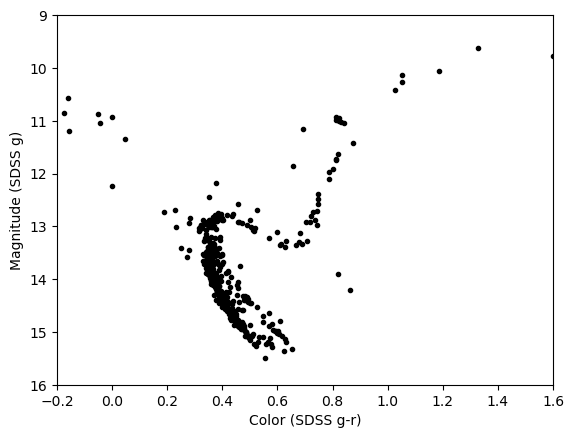

In [15]:
show_cluster_data(
    cone_search_radius=2,
    minimum_radial_velocity=20.4, #km/s
    maximum_radial_velocity=47.6, #km/s
    minimum_parallax=1.03, 
    maximum_parallax=1.27,
    proper_motion_delta=0.7,
    proper_motion_ra=-11,
    proper_motion_dec=-2.9,
)

---
### 6. The Final Challenge: Fitting the Dataset

For our final challenge, try to fit the data by changing the age of and distance to the cluster! (You can do this by changing the numbers next to `age=` and `distance=`)

Hint: The age should be somewhere between 1 and 10 Gyrs and the distance should be between 400 and 1200 pc.

Once you find what you think is the best fitting isochrone, compare with your neighbors! What age and distance did you get? How did that compare to your neighbor? If they are different, why do you think that is?

<Axes: xlabel='Color (SDSS g-r)', ylabel='Magnitude (SDSS g)'>

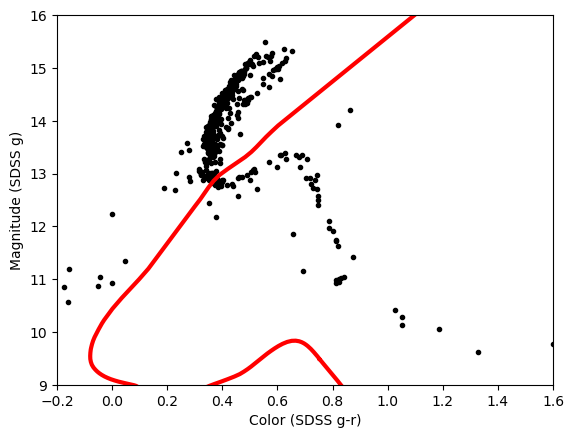

In [17]:
ax = show_cluster_data(
    cone_search_radius=2,
    minimum_radial_velocity=20.4, #km/s
    maximum_radial_velocity=47.6, #km/s
    minimum_parallax=1.03, 
    maximum_parallax=1.27,
    proper_motion_delta=0.7,
    proper_motion_ra=-11,
    proper_motion_dec=-2.9,
)

show_isochrone(
    age = 1, 
    distance = 400,
    ax = ax,
    color = 'red' # or whatever your favorite color is...
)